# IMU Dead Reckoning

### Reading IMU data (accelerometer + gyroscope) and inferring walking paths

# 


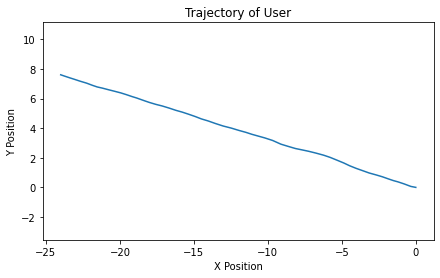

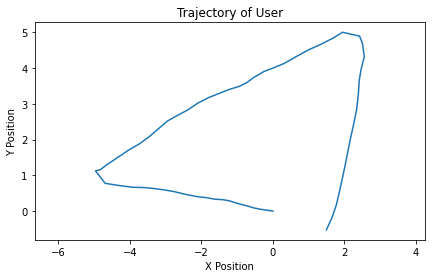

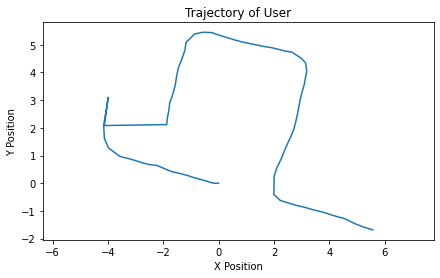

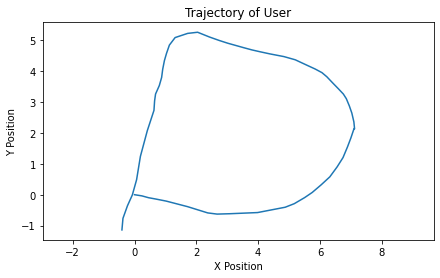

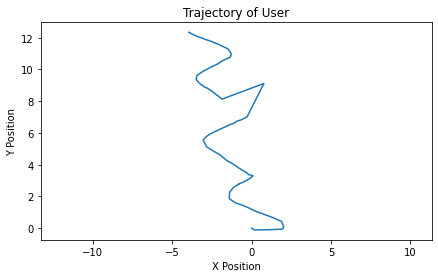

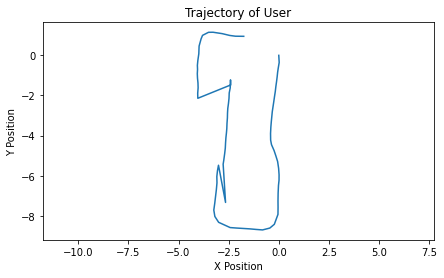

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal
import math
from scipy.spatial.transform import Rotation as R
# import plotly.express as px
# accelFile = pd.read_csv('Accelerometer-Copy2.csv', names = ["x-axis","y-axis",'z-axis']).dropna()
# gyroFile = pd.read_csv('Gyroscope-Copy2.csv', names=["x-axis","y-axis","z=axis"]).dropna()

def draw_path(accelFile,gyroFile,R,k):
    #Calculate initial rotation matrix

    initialAcc=np.array(accelFile.iloc[0])
    rotation=np.zeros(9).reshape(3,3)
    v1=[]
    v2=[]
    for i in range(3):
        v2.append(initialAcc[i])
    v2/=np.linalg.norm(v2)
    localY_localFrame=np.array([0,1,0])
    v1=localY_localFrame - np.multiply(np.dot(localY_localFrame,v2),v2)/np.linalg.norm(v2)
    v1/=np.linalg.norm(v1)
    for i in range(3):
        rotation[i][1]=v1[i]
        rotation[i][2]=v2[i]
    v0=np.cross(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))
    for i in range(3):
        rotation[i][0]=v0[i]    
    r_i=np.transpose(rotation)

    all_rot=[]
    all_rot.append(r_i)
    delta_t=1/100.
    d_r = np.zeros(9).reshape(3,3)

    for i in range(len(gyroFile)):
        l_i=np.array(gyroFile.iloc[i])
        theta_i=np.linalg.norm(l_i)*delta_t

        global_l=np.dot(r_i,l_i)
        global_l/=np.linalg.norm(global_l)

        r=R.from_rotvec(theta_i*global_l)
        d_r=r.as_matrix()
        r_i=np.dot(d_r,r_i)

        all_rot.append(r_i)


    for i in range(len(accelFile)):
        accelFile.iloc[i]=np.dot(all_rot[i],accelFile.iloc[i])

    x=accelFile['z-axis']

#     plt.figure(figsize=(20,5))
#     plt.plot(accelFile['z-axis'])
    np.average(np.array(x))

    y=np.array(x)
    if(k==1):
        peaks,_=scipy.signal.find_peaks(y,distance=60, prominence=15)
    elif (k==2):
        peaks,_=scipy.signal.find_peaks(y,distance=60, prominence=15)
    elif (k==3):
        peaks,_=scipy.signal.find_peaks(y,distance=60, prominence=18)
    elif (k==4):
        peaks,_=scipy.signal.find_peaks(y,distance=60, prominence=20)
    elif (k==5):
        peaks,_=scipy.signal.find_peaks(y,distance=60, prominence=17)
    else:
        peaks,_=scipy.signal.find_peaks(y,distance=60, prominence=18)



    mini=peaks
    time=[]
    for i in range(len(mini)):
        time.append(mini[i])
        if i<len(mini)-1:
            time.append( int((mini[i]+mini[i+1])/2.))
    mini=time
    
    if k==2:
        mini=mini[2:]
    if k==4:
        mini=mini[8:]
    if k==5:
        mini=mini[2:]
    

    from scipy.spatial.transform import Rotation as R

    delta_r_gyro=np.zeros(9).reshape(3,3)
    globalRot=all_rot[0]
    u=[]
    f=100.
    delta_t=1./f
    L=0.89
    sl=[]
    theta=0
    for i in range(len(mini)-1):
        start=mini[i]
        end=mini[i+1]
        rd = R.from_matrix(np.dot(all_rot[end], np.linalg.inv(all_rot[start])))
        v=np.array(rd.as_rotvec())
        theta=np.linalg.norm(v)*(end-start)*delta_t
        sl.append(L*2*np.sin(theta))
        if (i%2==0):
            u.append(v)
        else:
            u.append(-v)


    pos=[[0,0,0]]
    for i in range(len(u)):
        pos.append(np.add(pos[i],sl[i]*u[i]))

    x=[item[0] for i,item in enumerate(pos)]
    y=[item[1] for i,item in enumerate(pos)]
    z=[item[2] for i,item in enumerate(pos)]

    plt.figure(figsize=(7,4))
    plt.title('Trajectory of User')
    plt.plot(x,y)
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.axis('equal')
    
#     plt.savefig("{}.jpg".format(k))
    
    return x,y
    
    

for k in range(1,7):
    accelFile = pd.read_csv('AccelerometerTest{}.csv'.format(k), names = ["x-axis","y-axis",'z-axis']).dropna()
    gyroFile = pd.read_csv('GyroscopeTest{}.csv'.format(k), names=["x-axis","y-axis","z=axis"]).dropna()

    x,y = draw_path(accelFile,gyroFile,R,k)
#     f = open('{}.txt'.format(k),'w+')
#     for i in range(len(x)):
#         f.write(str(x[i])+' '+str(y[i])+'\n')
#     f.close()


